In [ ]:
!pip install scanpy

In [ ]:
!wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -P ./data/

In [48]:
import numpy as np
import pandas as pd
import scanpy as sc

In [49]:
sc.settings.verbosity = 3   # Tell scanpy we want it to be chatty today and inform us what's going on
sc.set_figure_params(facecolor = 'white', figsize = (5,5)) # Make figures bigger and on a white background because your PI is 70 and doesn't know what a .png is


First, lets read in our data

In [50]:
adata = sc.read_10x_mtx(
    './data/filtered_gene_bc_matrices/hg19',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache/home-passala-Gene_duplication_project-Code-Teaching-filtered_gene_bc_matrices-hg19-matrix.h5ad


Next, in case our annotation has overlapping gene symbols, we are going to make the gene symbols unique for any symbols with duplicates 

In [51]:
adata.var_names_make_unique() ## This adds a number after duplicate variable names

Now, lets explore the structure of our data a bit

In [52]:
adata # General Object view

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

As you can see, our AnnData Object stats off pretty empty. Its got the data matrix under adata.X, the cell barcodes under .obs, and the gene symbols and gene IDs under .var. Lets explore those additional aspects of the data

In [53]:
print(type(adata.obs)) # Prints the datatype of the observation section of the AnnData
adata.obs # Returns the observation section of the AnnData

<class 'pandas.core.frame.DataFrame'>


""
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1
...
TTTCGAACTCTCAT-1
TTTCTACTGAGGCA-1
TTTCTACTTCCTCG-1
TTTGCATGAGAGGC-1


In [54]:
print(type(adata.var)) ## Prints the Object type of the Variables of the AnnData
adata.var ## Returns view of the variables of the AnnData

<class 'pandas.core.frame.DataFrame'>


,gene_ids
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180
AC002321.2,ENSG00000215616


In [55]:
print(type(adata.X)) ## Prints the object type of the data matrix of the AnnData
adata.X ## Returns view of the data matrix of the AnnData

<class 'scipy.sparse._csr.csr_matrix'>


<2700x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 2286884 stored elements in Compressed Sparse Row format>

As you can see, we have two familiar data types, Pandas, and one that is a bit different, a sparse matrix. Because a single cell experiment has ~ 30,000 variables for each cell sequence, the matrix rapidly becomes huge as you add cells to it. However, you have zero reads for most genes in most cells, so our matrix is very sparse. Storing each individual zero is computationally taxing, so we use a sparse matrix to manage this behind the scenes for us. However, we will need to keep this in mind for cases and actions that require a dense matrix 

Next, we'll look at some initial info about our experiment, and look at how sparse the matrix is. 

In [56]:
total_size_of_matrix = 2700*32738 ## Calculate total number of cells in matrix
filled_posistions = 2286884 ### The number of cells with a non zero value
percent_of_matrix_filled = (filled_posistions/total_size_of_matrix)*100 ## You remember what a percentage is
print(f"Our Matrix only has a value at {round(percent_of_matrix_filled,3)}% of posistions!") # Round number and print it with an fstring


Our Matrix only has a value at 2.587% of posistions!


normalizing counts per cell
    finished (0:00:00)


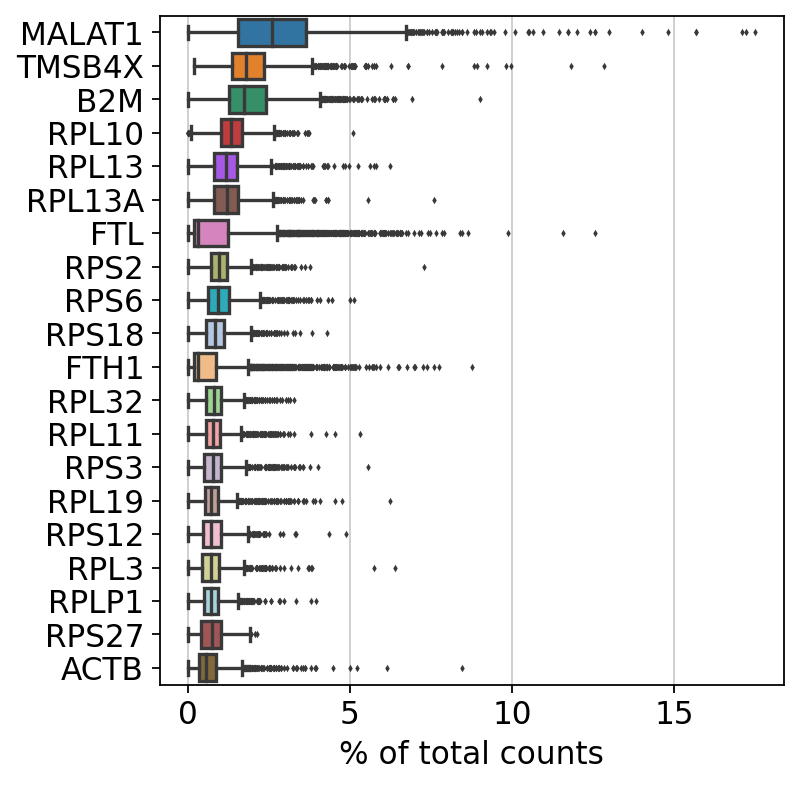

In [57]:
sc.pl.highest_expr_genes(adata, n_top=20) # Use builtin scanpy plotting function to visualize genes with the most reads


This plots our most expressed genes, letting us get an idea if our experiment had anything go dramatically wrong. For example, if your most expressed genes were all stress genes, you might be concerned you mishandled cells prior to sequencing.

 Before we keep going, we are going to rmove cells and genes that we aren't interested in. For genes, we are only interested in genes that are in our dataset in at least a few cells, a gene in a single cell doesn't tell us much. We are also only interested in cells with enough reads to be able to cluster them.

In [58]:
sc.pp.filter_cells(adata, min_genes=200) # Filter cells with less than 200 genes expressed
sc.pp.filter_genes(adata, min_cells=3) # Filter genes expressed in less than 3 cells

filtered out 19024 genes that are detected in less than 3 cells


Now, lets explore our cleaned dataset

In [59]:
adata.var

,gene_ids,n_cells
AL627309.1,ENSG00000237683,9
AP006222.2,ENSG00000228463,3
RP11-206L10.2,ENSG00000228327,5
RP11-206L10.9,ENSG00000237491,3
LINC00115,ENSG00000225880,18
...,...,...
AC145212.1,ENSG00000215750,16
AL592183.1,ENSG00000220023,323
AL354822.1,ENSG00000215615,8
PNRC2-1,ENSG00000215700,110


In [60]:
adata.obs

,n_genes
AAACATACAACCAC-1,781
AAACATTGAGCTAC-1,1352
AAACATTGATCAGC-1,1131
AAACCGTGCTTCCG-1,960
AAACCGTGTATGCG-1,522
...,...
TTTCGAACTCTCAT-1,1155
TTTCTACTGAGGCA-1,1227
TTTCTACTTCCTCG-1,622
TTTGCATGAGAGGC-1,454


As you can see, we've trimmed out a ton of genes that weren't expressed in our data! However, we didn't trim out any cells, as this data has already been preprocessed somewhat. We've also added some columns to our Pandas describing our cells and our genes. 

Next, we'll do some more advanced processeing based on mitochondrial DNA. This step is a bit dated and less important now that the rxn chemistry has improved, but its a good learning process. 

In [61]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'


In [62]:
adata.var

,gene_ids,n_cells,mt
AL627309.1,ENSG00000237683,9,False
AP006222.2,ENSG00000228463,3,False
RP11-206L10.2,ENSG00000228327,5,False
RP11-206L10.9,ENSG00000237491,3,False
LINC00115,ENSG00000225880,18,False
...,...,...,...
AC145212.1,ENSG00000215750,16,False
AL592183.1,ENSG00000220023,323,False
AL354822.1,ENSG00000215615,8,False
PNRC2-1,ENSG00000215700,110,False


In [63]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True) ### This calculates several QC metrics all at once, based on what genes we feed in

In [64]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


A peak at the metrics we calculated
The number of genes expressed in the count matrix - different because n_genes was calculated before filtering
The total counts per cell
The percentage of counts in mitochondrial genes
 now lets visualize them

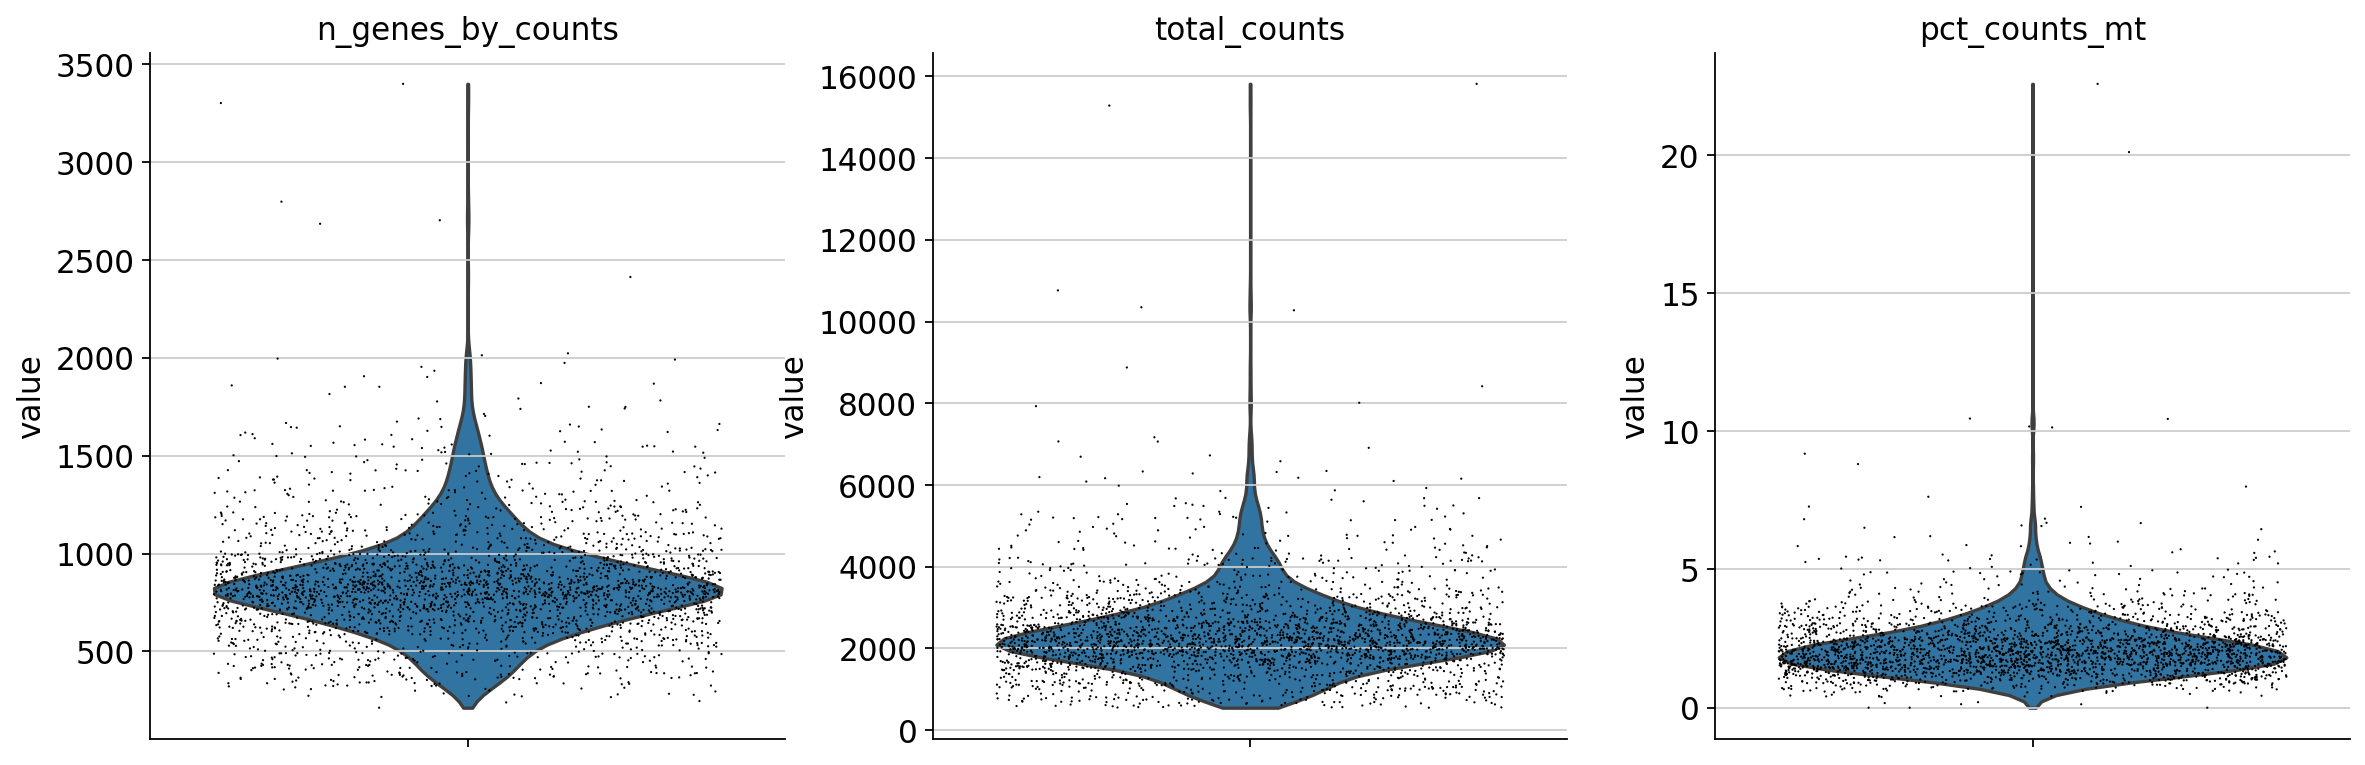

In [65]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True) ## Use built in plotting function to visualize the QC metrics we calculated

Now we want to remove genes with too many counts, as these could be droplets that got too many cells or another technical artifact. We also want to remove cells with too much mitochondrial DNA, as this indicates the cells are undergoing apoptosis. 

In [66]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :] ## Remove cells with more than 2500 counts (This is dated don't use this threshold on modern data)
adata = adata[adata.obs.pct_counts_mt < 5, :] #Remove cells with more than 5 % Mito reads

Now we will normalize the data , and logarithmize it. 

In [67]:
sc.pp.normalize_total(adata, target_sum=1e4) ## Scale counts in each cell to sum to 10,000 for comparisons between cells


normalizing counts per cell
    finished (0:00:00)


/home/passala/miniconda3/envs/Single_cell_data/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [68]:
sc.pp.log1p(adata) ## Log+1 transforms the data - this deals with zero counts since log(0) doesn't exist, without impacting rest of data


Now, to identify cell clusters we need to use genes that are different between cells. A gene that is expressed at the same level in every cell isn't useful for distinguishing them. So lets find our highly variable genes. 

In [69]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) # Identify highly variable genes based on mean and dispersion


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


This adds a lot of info to our .var, lets check it out. 

In [70]:
adata.var

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
AL627309.1,ENSG00000237683,9,False,9,0.003333,99.666667,9.0,False,0.013556,1.432845,-0.624328
AP006222.2,ENSG00000228463,3,False,3,0.001111,99.888889,3.0,False,0.004696,1.458631,-0.573416
RP11-206L10.2,ENSG00000228327,5,False,5,0.001852,99.814815,5.0,False,0.005673,1.325459,-0.836359
RP11-206L10.9,ENSG00000237491,3,False,3,0.001111,99.888889,3.0,False,0.002644,0.859264,-1.756848
LINC00115,ENSG00000225880,18,False,18,0.006667,99.333333,18.0,False,0.027437,1.457477,-0.575693
...,...,...,...,...,...,...,...,...,...,...,...
AC145212.1,ENSG00000215750,16,False,16,0.006667,99.407407,18.0,False,0.027441,1.784637,0.070275
AL592183.1,ENSG00000220023,323,False,323,0.134815,88.037037,364.0,False,0.485051,1.859941,-0.437388
AL354822.1,ENSG00000215615,8,False,8,0.002963,99.703704,8.0,False,0.012157,1.781924,0.064919
PNRC2-1,ENSG00000215700,110,False,110,0.042963,95.925926,116.0,False,0.160366,1.567491,-0.358474


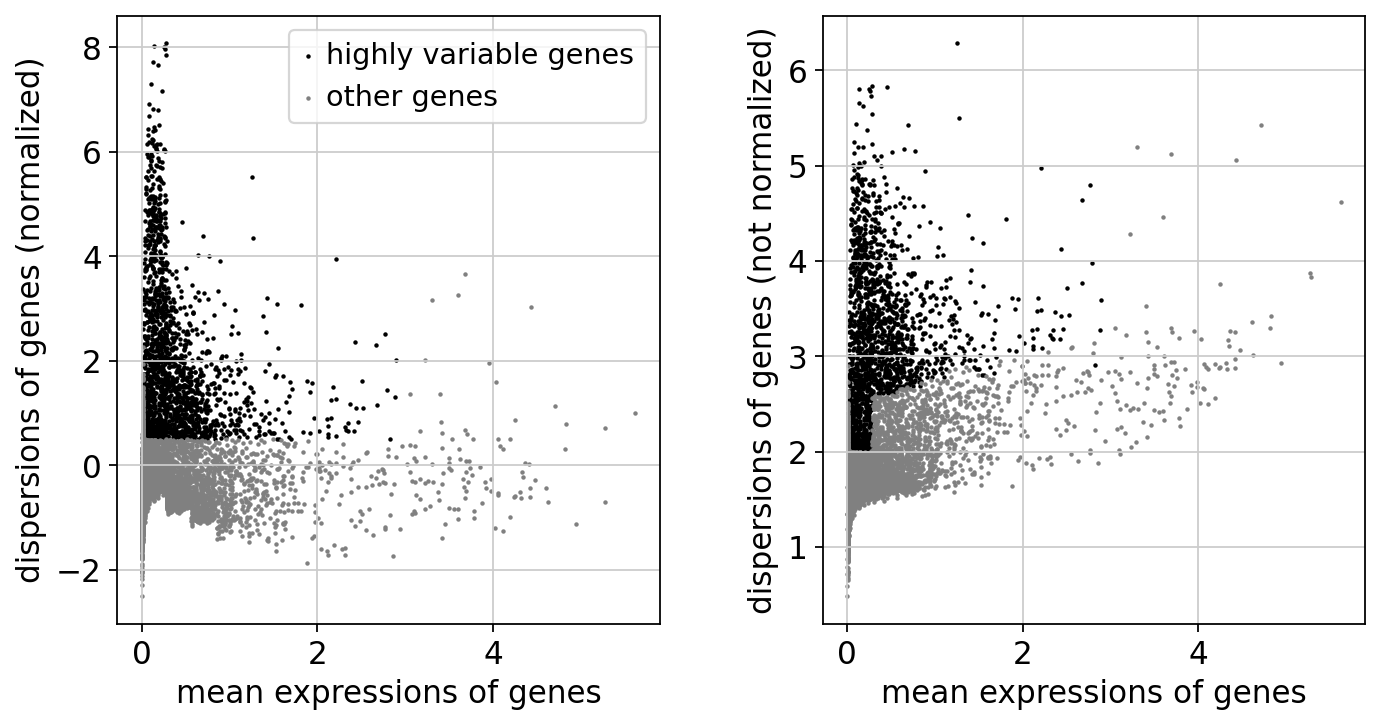

In [71]:
sc.pl.highly_variable_genes(adata) # Use Built in plotting function to visualize highly variable genes


Now that we've found our highly variable genes, lets begin to reduce the dimensionality of our data and everyone can listen to me blather about dimensionality. We are going to skim over a lot of what the next steps are doing behind the scenes because they are very math heavy and you're using them as tools.

In [72]:
sc.tl.pca(adata, svd_solver='arpack') ## Identifies


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


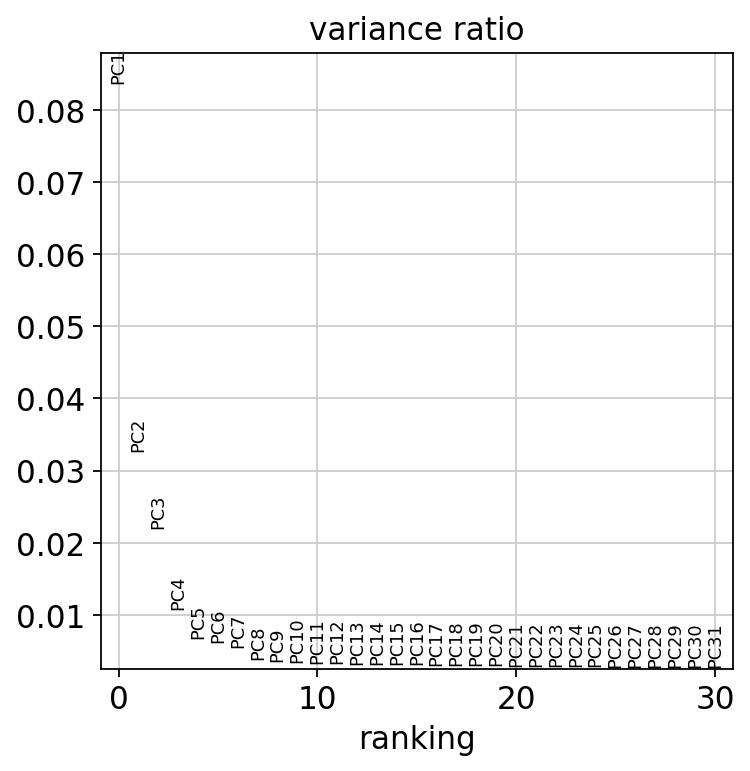

In [84]:
#sc.pl.pca_variance_ratio(adata) #Visualize contribution of PCAs to variance - uncomment if curious will not affect data


In [74]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40) # Finds Distances in multidimensional space between cells


computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [75]:
sc.tl.umap(adata) #Visualizes cells in multidimensional space as 2d embedding


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


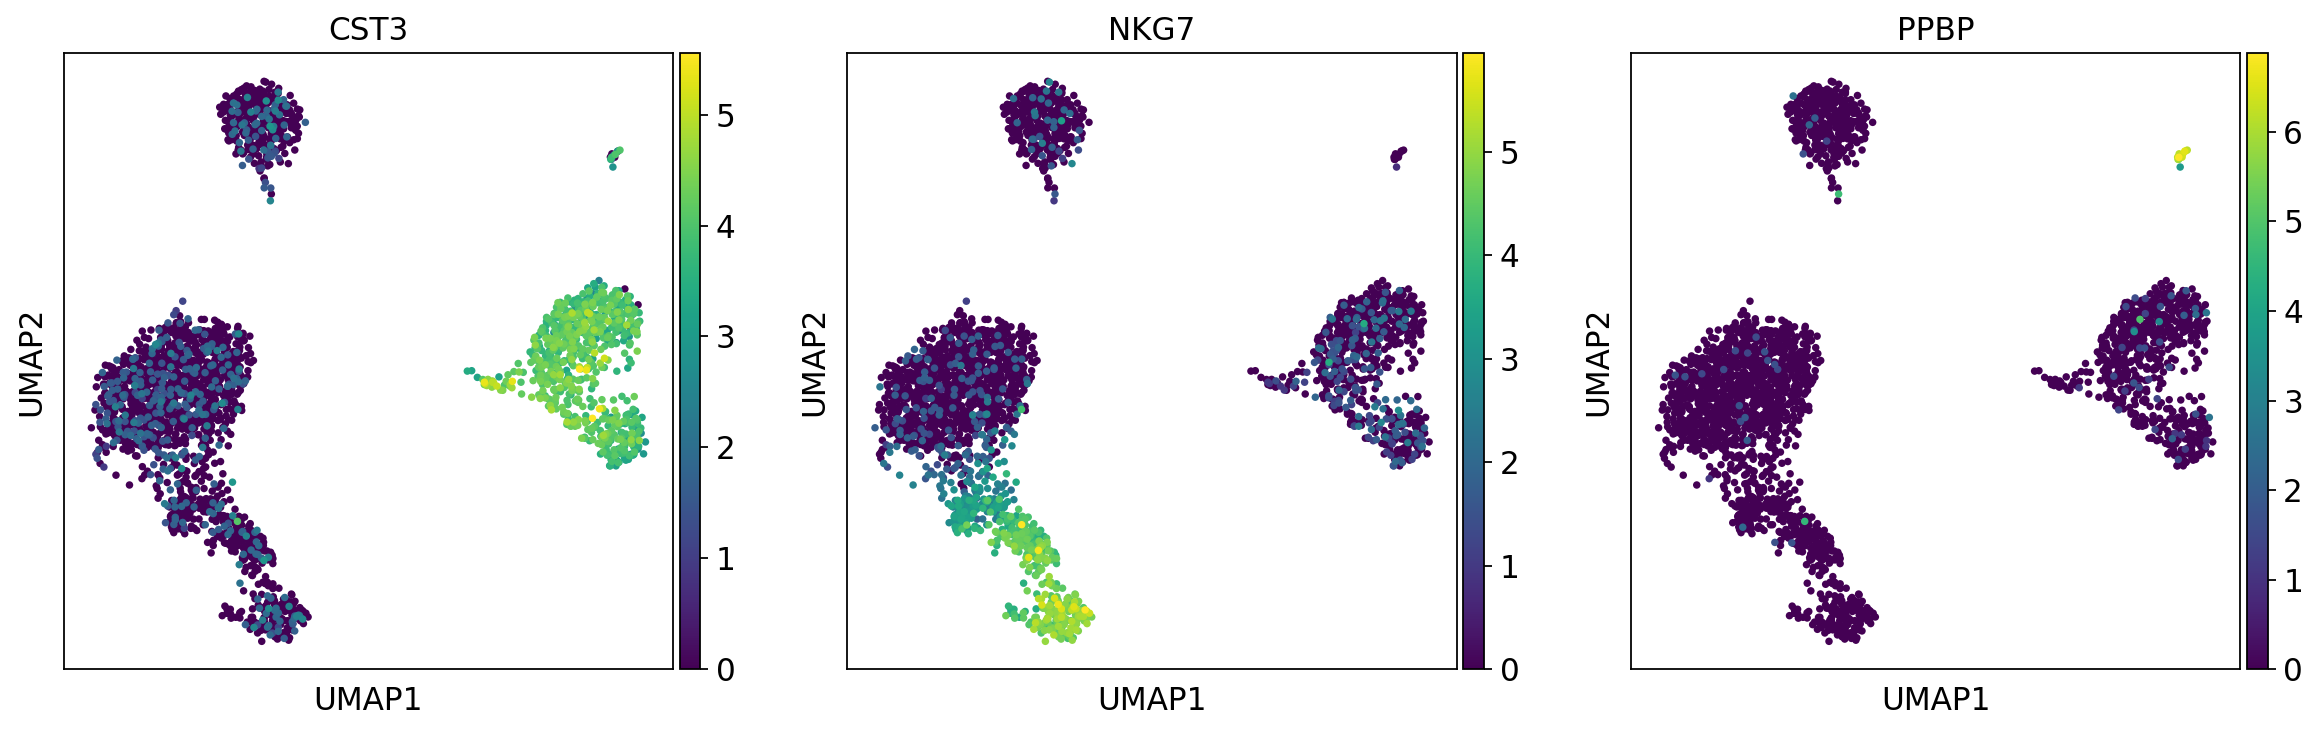

In [76]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP']) #shows embedding with cells colored by expression of 3 marker genes


In [77]:
sc.tl.leiden(adata, resolution = .8) # Clusters cells by distance in multidimensional space


running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [78]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776,3
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596,2
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736,0
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085,1
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490,5
...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436,1
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422,2
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150,2
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795,2


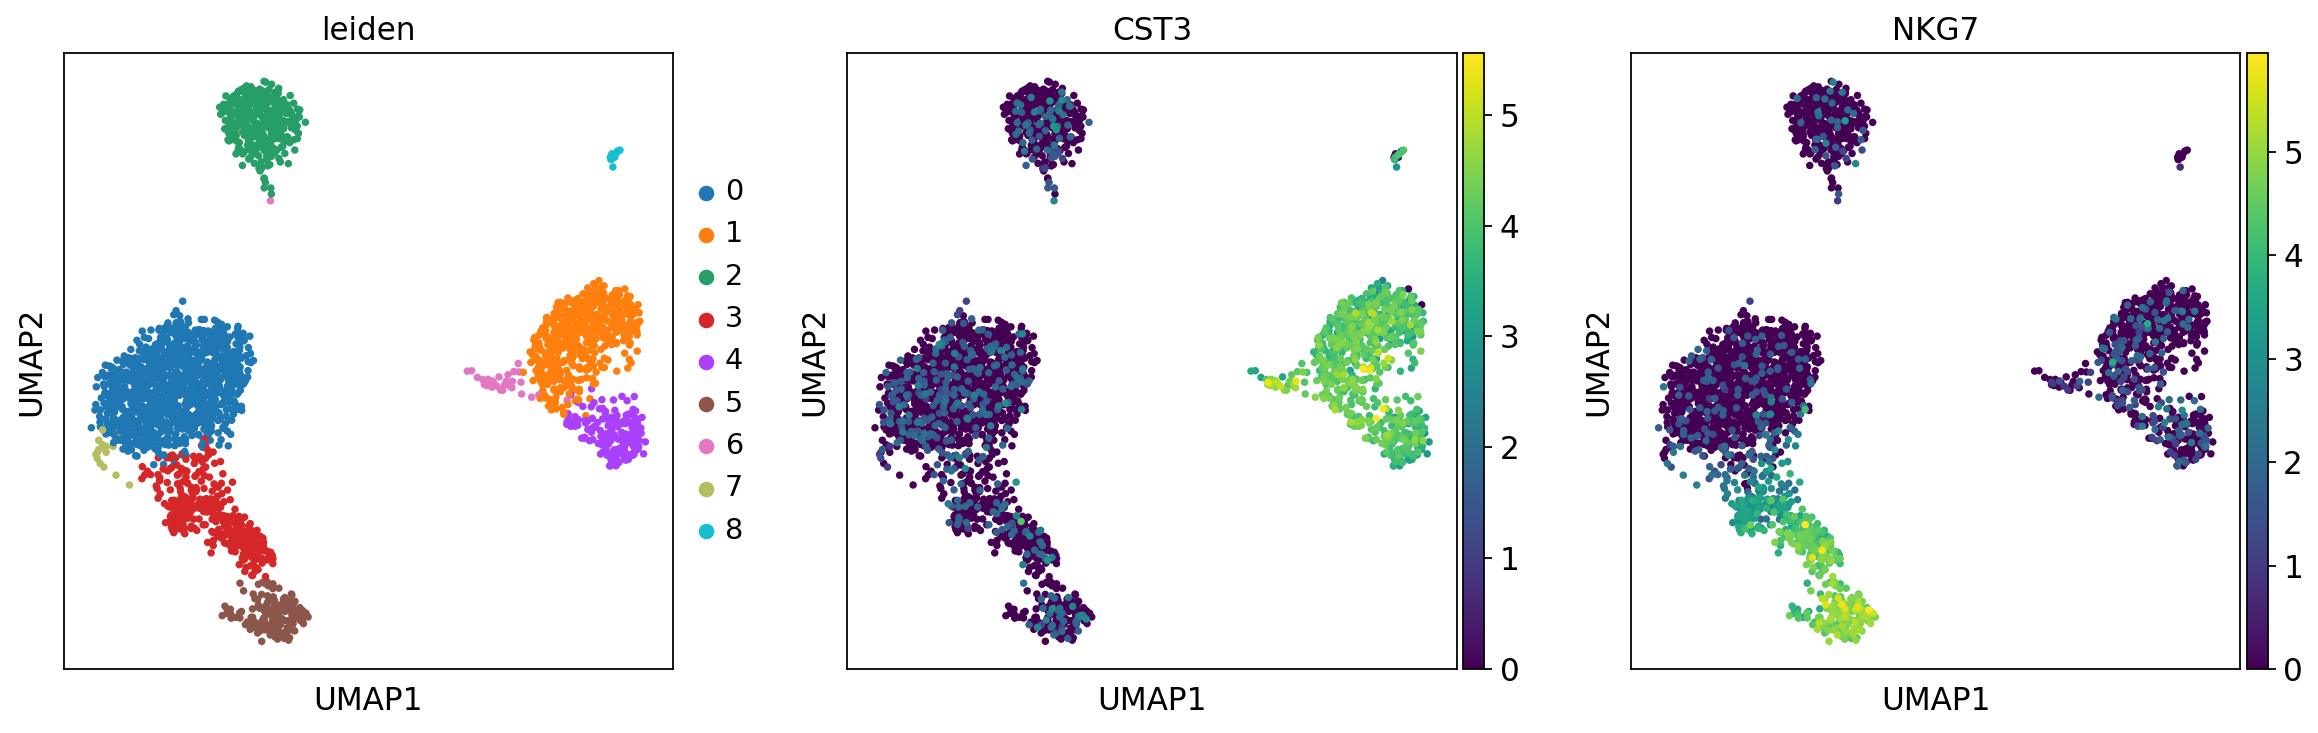

In [79]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7']) # Visualize clustering 


Now that we have clusters, we can do things like find marker genes, ID cell types, and do differential gene expression. 

In [80]:
# #new_cluster_names = ['CD4 T', 'CD14 Monocytes','B', 'CD8 T', 'FCGR3A Monocytes', 'NK','Dendritic', ' ','Megakaryocytes']
# #adata.rename_categories('leiden', new_cluster_names)

# #sc.pl.umap(adata, color='leiden', legend_loc='on data', legend_fontsize= 'x-small', title = 'Identified Cell Clusters')
